[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_06_metricas-published.ipynb)

# Evaluación

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display


## Matrices de confusión

Recordemos que una matriz de confusión nos permite observar el resultado de nuestra clasificación. Para armarla:
- cada fila los valores observados o reales
- cada columna los valores predichos

Y en cada celda:
- $m_{i,i}$ las instancias bien clasificadas
- $m_{i,j}\ (con\ i\neq j)$ las instancias mal clasificadas (era de instancia $i$ pero el clasificador dijo $j$)

Implementar la siguiente función para poder construir una matriz de confusión binaria. Deberá tomar la etiqueta que es considerada "éxito" como parámetro.

In [12]:
from typing import Tuple, Any

def confusion_matrix(y_real: list, y_predicted: list, positive_label: Any, show: bool =False) -> Tuple[int, int, int, int]:
    # Construye una matriz de confusión (binaria)
    # y_actual es la secuencia de etiquetas reales
    # y_predicted es la secuencia de etiquetas predichas por el clasificador
    # positive_label indica cuál es la etiqueta considerada positiva.

    tp = 0   # verdaderos positivos
    tn = 0  # verdaderos negativos
    fp = 0  # falsos positivos
    fn = 0  # falsos negativos

    for i in range(0,len(y_pred)):
        if y_pred[i] == y_real[i]:
            if y_real[i] == positive_label:
               tp +=1
            else: tn +=1
        elif y_pred[i] == positive_label:
           fp += 1
        else: fn += 1

    if show:
        display(pd.DataFrame([[tp, fn], [fp, tn]], index=["real +", "real -"], columns=["pred +", "pred -"]))


    return tp, tn, fp, fn


### Test 1

Vamos a probar ahora la función. Sabiendo que se recibieron 990 emails. Y que se recibieron, en este orden:
  - 10 correos no deseados
  - 978 correos
  - 2 correos no deseados
  
El filtro anti-spam estableció las siguientes clasificaciones (también en órden):
  - 2 correos no deseados
  - 900 correos
  - 20 correos no deseados
  - 68 correos
  
Construir dos listas de strings que contengan `"spam"` o `"no-spam"` y que representen la etiqueta real (`y_real`) y la etiqueta predicha por el filtro anti-spam (`y_pred`).

In [27]:
y_real = ["spam"] * 10 + ["no-spam"] * 978 + ["spam"] *2
y_pred = ["spam"] *2 + ["no-spam"] *900 + ["spam"] *20 + ["no-spam"] * 68

Correr la matriz de confusión y verificar que el resultado es el esperado.

In [13]:
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred, positive_label="spam", show=False)
# Si se cambia show a True se puede visualizar la matriz de confusión

print("Test 1")
print("(tp, tn, fp, fn) = ", (tp, tn, fp, fn))
assert((tp, tn, fp, fn) == (2, 958, 20, 10))
print("OK")

Test 1
(tp, tn, fp, fn) =  (2, 958, 20, 10)
OK


## Métricas

En esta sección trabajeremos con las métricas estándares de clasificación.

### Test 2
A continuacion completar las funciones que computan las distintas métricas

In [29]:
def accuracy_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return  (tp + tn) / (tp + tn + fn + fp)


def precision_score(tp: int, tn: int, fp: int, fn: int) -> float:
    if tp+fp == 0:  return 1
    return  tp/ (tp+fp)


def recall_score(tp: int, tn: int, fp: int, fn: int) -> float:
    if (fn +  tp) == 0 : return 1
    return  tp / (fn +  tp)


def f_beta_score(tp: int, tn: int, fp: int, fn: int, beta: float) -> float:
    prec = precision_score(tp, tn, fp, fn)
    recl = recall_score(tp, tn, fp, fn)
    return  (1+beta) * ((prec * recl) / ( prec* beta + recl) )


def f1_score(tp: int, tn: int, fp: int, fn: int) -> float:
    return f_beta_score(tp, tn, fp, fn, beta=1)


def all_metrics(tp: int, tn: int, fp: int, fn: int) -> float:
    accuracy = round(accuracy_score(tp, tn, fp, fn), 3)
    precision = round(precision_score(tp, tn, fp, fn), 3)
    recall = round(recall_score(tp, tn, fp, fn), 3)
    f1 = round(f1_score(tp, tn, fp, fn), 3)
    return accuracy, precision, recall, f1


Evaluar las funciones con el siguiente caso de test.

In [30]:
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred, positive_label="spam")
(accuracy, precision, recall, f1) = all_metrics(tp, tn, fp, fn)

print("Test 2")
print("(accuracy, precision, recall, f1) = ", (accuracy, precision, recall, f1))
assert((accuracy, precision, recall, f1) == (0.97, 0.091, 0.167, 0.118))
print("OK")

Test 2
(accuracy, precision, recall, f1) =  (0.97, 0.091, 0.167, 0.118)
OK


## Comparando predicciones

Sean los siguientes datos provenientes de 2 clasificadores (A y B) y el valor real de las etiquetas.

In [31]:
# Etiquetas reales
y_real = ["perro"] * 18 + ["gato"] * 980 + ["perro"] * 5

# Etiquetas devueltas por "clasificador A"
y_pred_A = ["gato"] * 980 + ["perro"] * 20 + ["gato"] * 3

# Etiquetas devueltas por "clasificador B"
y_pred_B = ["perro"] * 40 + ["gato"] * 900 + ["perro"] * 60 + ["gato"] * 3

df = pd.DataFrame(data={"y_real": y_real,
                           "y_pred_A": y_pred_A,
                           "y_pred_B": y_pred_B,
                          })

res = []
print("Clasificador A, etiqueta de éxito: gato")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_A, positive_label="gato", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador B, etiqueta de éxito: gato")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_B, positive_label="gato", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador A, etiqueta de éxito: perro")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_A, positive_label="perro", show=True)
res.append(all_metrics(tp, tn, fp, fn))

print("Clasificador B, etiqueta de éxito: perro")
tp, tn, fp, fn = confusion_matrix(y_real=y_real, y_predicted=y_pred_B, positive_label="perro", show=True)
res.append(all_metrics(tp, tn, fp, fn))

pd.DataFrame(res, columns=["accuracy", "precision", "recall", "f1"], index=["CLF A (gato)", "CLF B (gato)", "CLF A (perro)", "CLF B (gato)"])

Clasificador A, etiqueta de éxito: gato


,pred +,pred -
real +,0,990
real -,0,0


Clasificador B, etiqueta de éxito: gato


,pred +,pred -
real +,0,990
real -,0,0


Clasificador A, etiqueta de éxito: perro


,pred +,pred -
real +,0,990
real -,0,0


Clasificador B, etiqueta de éxito: perro


,pred +,pred -
real +,0,990
real -,0,0


,accuracy,precision,recall,f1
CLF A (gato),0.0,1,0.0,0.0
CLF B (gato),0.0,1,0.0,0.0
CLF A (perro),0.0,1,0.0,0.0
CLF B (gato),0.0,1,0.0,0.0


¿Qué podemos concluir con este experimento?


## Analizando $F_1$

A continuación realizamos un experimento variando levemente las condiciones en cada pasada.

El código que realiza el experimento es el siguiente:

In [32]:
y_real = ["perro"] * 100 + ["gato"] * 900 + ["perro"] * 80
y_pred =   ["perro"] * 80 + ["gato"] * 800 + ["perro"] * 200

tns_gato = []
f1s_gato = []
f1s_perro = []
f1s_avg = []


for i in range(0, 10000, 100):
    y_real_2 = y_real + ["perro"] * i
    y_pred_2 = y_pred + ["perro"] * i

    tp1, tn1, fp1, fn1 = confusion_matrix(y_real=y_real_2, y_predicted=y_pred_2, positive_label="gato")
    tp2, tn2, fp2, fn2 = confusion_matrix(y_real=y_real_2, y_predicted=y_pred_2, positive_label="perro")

    f1_gato = f1_score(tp1, tn1, fp1, fn1)
    f1_perro = f1_score(tp2, tn2, fp2, fn2)
    f1_avg = (f1_gato + f1_perro) / 2

    tns_gato.append(tn1)
    f1s_gato.append(f1_gato)
    f1s_perro.append(f1_perro)
    f1s_avg.append(f1_avg)

1. ¿Qué realiza este experimento?
1. ¿Qué relación existe entre la $F_1$ de perro y de gato a medida que se aumenta la cantidad de perros que tiene la muestra?
1. ¿En algún punto valen lo mismo?¿En cuál?¿Por qué?

A continuación se propone graficar cómo varía la métrica $F_1$ al aumentar la cantidad de True Negatives (observar
que estamos cambiando la cantidad de instancias sobre las que testeamos).

1. ¿Qué curva modifica más el agregado de las etiquetas `perro`?¿Por qué?
1. ¿Qué se puede concluir de este experimento?
    

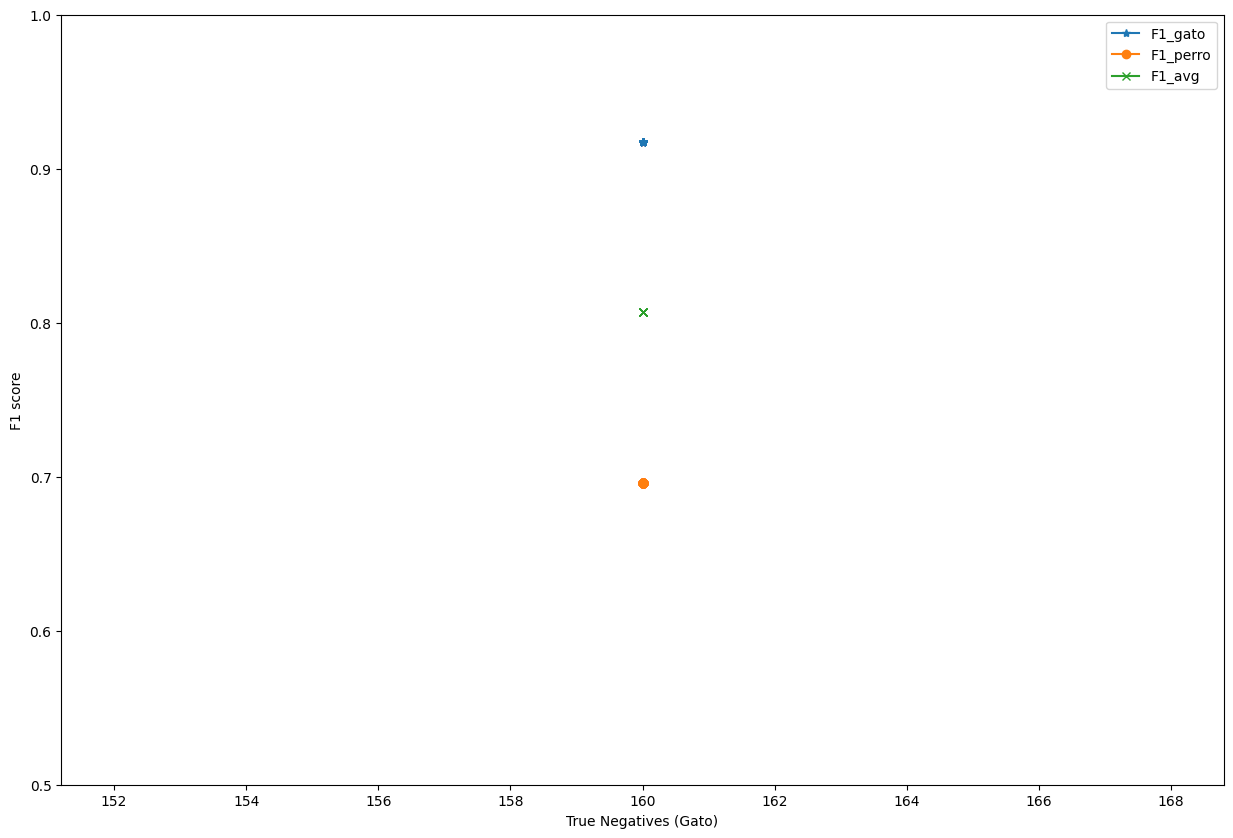

In [33]:
plt.figure(figsize=(15, 10))

plt.plot(tns_gato, f1s_gato, "*-", label="F1_gato")
plt.plot(tns_gato, f1s_perro, "o-", label="F1_perro")
plt.plot(tns_gato, f1s_avg, "x-", label="F1_avg")
plt.xlabel("True Negatives (Gato)")
plt.ylabel("F1 score")
plt.ylim([0.5,1])
plt.legend()
plt.show()
